# Aula 1

https://www.kaggle.com/benroshan/factors-affecting-campus-placement

In [ ]:
import pandas as pd

In [ ]:
url = 'https://github.com/alura-tech/pos-data-science-validacao/raw/main/Placement_Data_Full_Class.csv'

In [ ]:
dado = pd.read_csv(url)

In [ ]:
dado.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
dado['sl_no'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
dado.shape

(215, 15)

In [ ]:
X = dado.drop(['sl_no','status','salary'],axis=1)

In [ ]:
X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23


In [ ]:
X_cont = X[X.describe().columns]

In [ ]:
X_cat = X.drop(X.describe().columns,axis=1)

In [ ]:
X_cat

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin
...,...,...,...,...,...,...,...
210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin
211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin
212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin
213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR


## One hot encoding

In [ ]:
X_enc = pd.get_dummies(X_cat, prefix=X_cat.columns)

In [ ]:
X_enc

,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1
1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0
2,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0
3,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
211,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0
212,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0
213,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1


In [ ]:
X_completo = pd.concat([X_cont, X_enc], axis=1 )

In [ ]:
y = dado['status']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_completo,y,stratify=y)
modelo_logistico = LogisticRegression()
modelo_arvore = DecisionTreeClassifier()

print('Resultado da Regressão Logística')
modelo_logistico.fit(X_treino,y_treino)
y_predicao = modelo_logistico.predict(X_teste)
print(accuracy_score(y_teste,y_predicao))

print('Resultado da Árvore de decisão')
modelo_arvore.fit(X_treino,y_treino)
y_predicao = modelo_arvore.predict(X_teste)
print(accuracy_score(y_teste,y_predicao))

Resultado da Regressão Logística
0.8333333333333334
Resultado da Árvore de decisão
0.7222222222222222


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Desafios

- Desafio 1 - Fazer a análise exploratória, pensando nas colunas que podem ter um impacto maior no resultado do machine learning. 

- Desafio 2 - Testar parâmetros diferentes para o modelo

# Aula 2

## Matriz de confusão

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


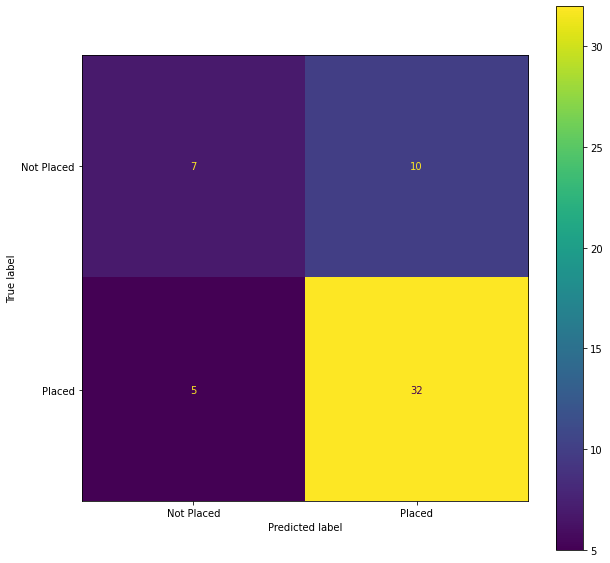

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(modelo_arvore,X_teste,y_teste,ax=ax)


!['Matrix de confusão genérica'](https://github.com/alura-tech/pos-data-science-validacao/raw/main/confusao.png)

In [ ]:
VN = 11
VP = 33
FN = 4
FP = 6

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_teste,y_predicao))

              precision    recall  f1-score   support

  Not Placed       0.58      0.41      0.48        17
      Placed       0.76      0.86      0.81        37

    accuracy                           0.72        54
   macro avg       0.67      0.64      0.65        54
weighted avg       0.71      0.72      0.71        54



### Precision - De todas as minhas classificações positivas, quantas realmente são positivas.

In [ ]:
# Precision 
VP/(VP+FP)

0.8461538461538461

### Recall - De todas as minhas classes positivas, quantas eu realmente classifiquei corretamente. 

In [ ]:
VP/(VP+FN)

0.8918918918918919

In [ ]:
p = 1.0
r = 0.5
f1 = 2*(p*r)/(p+r)
f1

0.6666666666666666

## Curva ROC e AUC

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


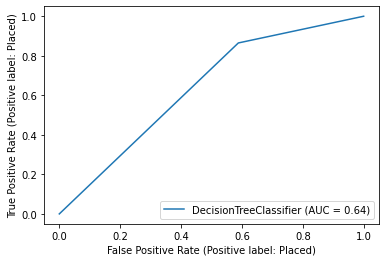

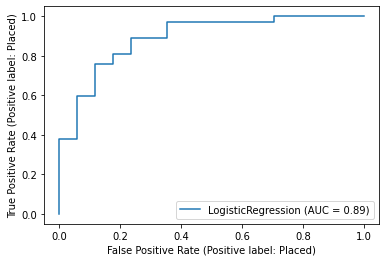

In [ ]:
plot_roc_curve(modelo_arvore,X_teste,y_teste)
plot_roc_curve(modelo_logistico,X_teste,y_teste)

Taxa de Verdadeiros Positivos = Verdadeiros Negativos / (Verdadeiros Negativos + Falsos Negativos)

Taxa de Falsos Positivos = Falsos Positivos / (Falsos Positivos + Verdadeiros Positivos)


In [ ]:
prob_arvore = modelo_arvore.predict_proba(X_teste)
roc_auc_score(y_teste,prob_arvore[:,1])

0.6383147853736089

In [ ]:
def roda_modelo(modelo,X,y):

    X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,stratify=y)

    modelo.fit(X_treino,y_treino)
    y_predicao = modelo.predict(X_teste)

    prob_predict = modelo.predict_proba(X_teste)

    auc = roc_auc_score(y_teste, prob_predict[:,1])
    print(f'AUC: {auc}')
    
    print('\nClassification Report')
    print(classification_report(y_teste,y_predicao))


In [ ]:
roda_modelo(modelo_arvore,X_completo,y)

AUC: 0.7424483306836247

Classification Report
              precision    recall  f1-score   support

  Not Placed       0.65      0.65      0.65        17
      Placed       0.84      0.84      0.84        37

    accuracy                           0.78        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.78      0.78      0.78        54



## Desafios

- Desafio 01: Pesquisar sobre o F-Score

- Desafio 02: Plotar a curva ROC

- Desafio 03: Pensar em como reduzir o efeito da aleatoriedade

# Aula 3

In [ ]:
import numpy as np

In [ ]:
def roda_n_modelos(modelo,X,y,n):

    auc_vetor = []

    for _ in range(n):

        X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,stratify=y)

        modelo.fit(X_treino,y_treino);
    
        prob_predict = modelo.predict_proba(X_teste)

        auc = roc_auc_score(y_teste, prob_predict[:,1])
        auc_vetor.append(auc)

    auc_medio = np.mean(auc_vetor)
    auc_std = np.std(auc_vetor)
    print(f'AUC médio: {auc_medio }')
    print(f'Intervalo: {auc_medio - 2*auc_std } - {auc_medio + 2*auc_std}')

In [ ]:
roda_n_modelos(modelo_arvore,X_completo,y,100)

AUC médio: 0.7433545310015898
Intervalo: 0.6214252009213554 - 0.8652838610818241


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
roda_n_modelos(modelo_logistico,X_completo,y,100)

AUC médio: 0.9260413354531001
Intervalo: 0.8609314767285577 - 0.9911511941776424
